# Report of ESE5023 Assignment 04
---
HUANG Pizhu  
12332298

### *Prerequisite data in this assignment*
**nc data**: Mean Surface Soil Moisture from 2000 to 2020  
**usgs_earthquakes**: given 

## 1. Global Earthquakes
The earthquakes data is year of 2014, drop na in mag colums and find the top 50 mag, use `scatter()` to plot it.  
The projection of given map is `projection=ccrs.Robinson(central_longitude=180)`.  
Adjust details and generate the similar map of given.

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('usgs_earthquakes.csv')
df = df1[['latitude','longitude','mag','time']]
df.dropna(subset=['mag'],inplace=True)
df = df.sort_values('mag',ascending=False).head(50)
df = df1[['latitude','longitude','mag','time']]
df.dropna(subset=['mag'],inplace=True)
df = df.sort_values('mag',ascending=False).head(50)

C:\Users\Pizhu_Huang\AppData\Local\Temp\ipykernel_18556\2755040276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['mag'],inplace=True)
C:\Users\Pizhu_Huang\AppData\Local\Temp\ipykernel_18556\2755040276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['mag'],inplace=True)


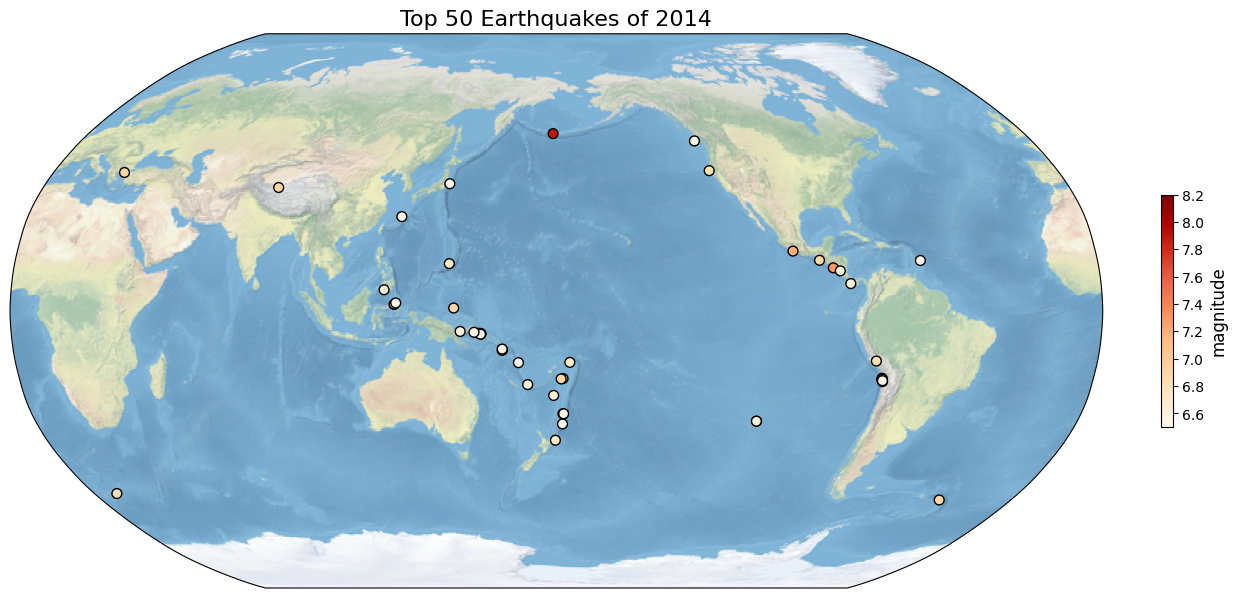

In [3]:
fig = plt.figure(figsize=(15, 8), dpi=100)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.stock_img()
sc = ax.scatter(df['longitude'], df['latitude'], c=df['mag'], 
                cmap='OrRd', transform=ccrs.PlateCarree(), s=50,edgecolor='k')
cbar = fig.colorbar(sc, fraction=0.01) 
cbar.set_label('magnitude',fontsize=12)
cbar.set_ticks(np.arange(6.6, 8.3, 0.2))
ax.set_title('Top 50 Earthquakes of 2014',fontsize=16)

plt.show()

## 2. Explore a netCDF dataset

Use the data from assignment3.

In [24]:
from pathlib import Path
filepath = 'D:\workdirectory\Assignment\PS4\data'  # 文件夹目录filepath需要修改成保存有nc文件的文件夹！！！
filelist = list(Path(filepath).glob('*.nc4'))
ds = xr.open_mfdataset(filelist)
ds = ds.SoilMoist_S_inst
lon = ds.lon
lat = ds.lat
dsm = ds.mean(dim='time')


Get the longitudes and latitudes of max and min point in Mean Surface Soil Moistur to marking in the map.

In [25]:
max_position = dsm.max().compute()
min_position = dsm.min().compute()

maxp = dsm.compute().where(dsm.compute() == max_position,drop=True)
minp = dsm.compute().where(dsm.compute() == min_position,drop=True)

This plotting map modify the codes in class  
Plot a global map of mean surface soil moisture from 2000 to 2020

a project:PlateCarree    
x label and ticks: longitude  
y label and ticks: latitude  
title:Mean Surface Soil Moisture from 2000 to 2020    
gridlines:defalt  
legend: Moisture and unit  
colorbar: Spectral form  
masks or features: ocean masking and lakes features  
annotations: max and min points  
text box: in right side  

d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'crs'
  result = super().contourf(*args, **kwargs)
d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
d:\Program\Anaconda\envs\Env\Lib\site-package

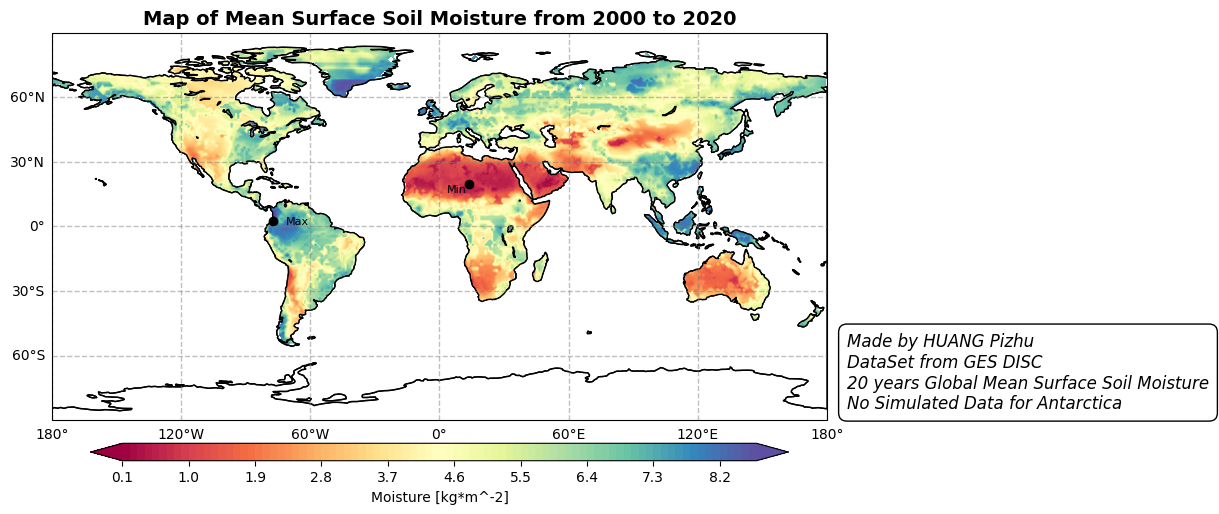

In [26]:
def plot_map(my_projection,data):
    # Create and define the size of a figure object 
    plt.figure(figsize=(10,10), dpi=100)
    
    # Create an axes with Orthographic projection style
    ax = plt.axes(projection=my_projection)

    # Add natural features to axes using cartopy.feature (cfeature)
    ax.coastlines()
    ax.set_global()
    #ax.stock_img()
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='slategrey')
    p = ax.contourf(data.lon,data.lat,data,cmap='Spectral',levels=100,extend = 'both',crs=ccrs.PlateCarree())
    #set a colorbar
    cbar = plt.colorbar(p,orientation='horizontal',aspect=40,pad = 0.03,shrink=0.9)
    cbar.set_label('Moisture [kg*m^-2]')
    ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='white')
    # Add lat/lon gridlines, draw gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='gray', alpha=0.5, linestyle='--')

# 设置经度和纬度的显示位置
    gl.xlabels_top = False  
    gl.ylabels_left = True  
    gl.ylabels_right = False  
    gl.xlabels_bottom = True
    gl.xlabel_style = {'size': 10}  # 设置经度标签的字体大小
    gl.ylabel_style = {'size': 10}  # 设置纬度标签的字体大小
    # Manipulate latitude and longitude gridline numbers and spacing
    gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))

    Text = 'Made by HUANG Pizhu\nDataSet from GES DISC\n20 years Global Mean Surface Soil Moisture\nNo Simulated Data for Antarctica'
    ax.text(0.92, 0.26, Text, transform=plt.gcf().transFigure, 
         fontsize=12, fontstyle='italic',ha='left', color='k',
         bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})
# ---------------------------------- points ---------------------------------- #

    max_lon, max_lat = maxp.lon.values[0], maxp.lat.values[0]
    min_lon, min_lat = minp.lon.values[0], minp.lat.values[0]

    ax.plot(max_lon, max_lat, 'ko', markersize=6, transform=ccrs.PlateCarree())
    ax.plot(min_lon, min_lat, 'ko', markersize=6, transform=ccrs.PlateCarree())

    ax.text(max_lon+6, max_lat+2, 'Max', color='k', fontsize=8, transform=ccrs.PlateCarree(), va='top',ha='left')
    ax.text(min_lon-10, min_lat, 'Min', color='k', fontsize=8, transform=ccrs.PlateCarree(), va='top',ha='left')

    # Add title
    ax.set_title('Map of Mean Surface Soil Moisture from 2000 to 2020', fontsize=14, fontweight='bold')
plot_map(ccrs.PlateCarree(),dsm)


Map of fellow one is sipited by https://blog.csdn.net/weixin_44237337/article/details/123557098 and https://cloud.tencent.com/developer/article/1768671.  
North compass function comes from https://blog.csdn.net/qq_44907989/article/details/125584822.  

In [27]:
import matplotlib.patches as mpatches
def add_north(ax, labelsize=18, loc_x=0.09, loc_y=0.97, width=0.06, height=0.09, pad=0.14):
    """
    画一个比例尺带'N'文字注释
    主要参数如下
    :param ax: 要画的坐标区域 Axes实例 plt.gca()获取即可
    :param labelsize: 显示'N'文字的大小
    :param loc_x: 以文字下部为中心的占整个ax横向比例
    :param loc_y: 以文字下部为中心的占整个ax纵向比例
    :param width: 指南针占ax比例宽度
    :param height: 指南针占ax比例高度
    :param pad: 文字符号占ax比例间隙
    :return: None
    """
    minx, maxx = ax.get_xlim()
    miny, maxy = ax.get_ylim()
    ylen = maxy - miny
    xlen = maxx - minx
    left = [minx + xlen*(loc_x - width*.5), miny + ylen*(loc_y - pad)]
    right = [minx + xlen*(loc_x + width*.5), miny + ylen*(loc_y - pad)]
    top = [minx + xlen*loc_x, miny + ylen*(loc_y - pad + height)]
    center = [minx + xlen*loc_x, left[1] + (top[1] - left[1])*.4]
    triangle = mpatches.Polygon([left, top, right, center], color='k')
    ax.text(s='N',
            x=minx + xlen*loc_x,
            y=miny + ylen*(loc_y - pad + height),
            fontsize=labelsize,
            horizontalalignment='center',
            verticalalignment='bottom')
    ax.add_patch(triangle)


a project:Mercator    
x label and ticks: longitude  
y label and ticks: latitude  
title:Mean Surface Soil Moisture from 2000 to 2020    
gridlines:defalt  
legend: Moisture and unit  
colorbar: Spectral form  
masks or features: ocean masking  
annotations: Beijing    
text box: in right side 

  
Additionally, use cnmaps module to generate China region and mask others.  

d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
d:\Program\Anaconda\envs\Env\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attr

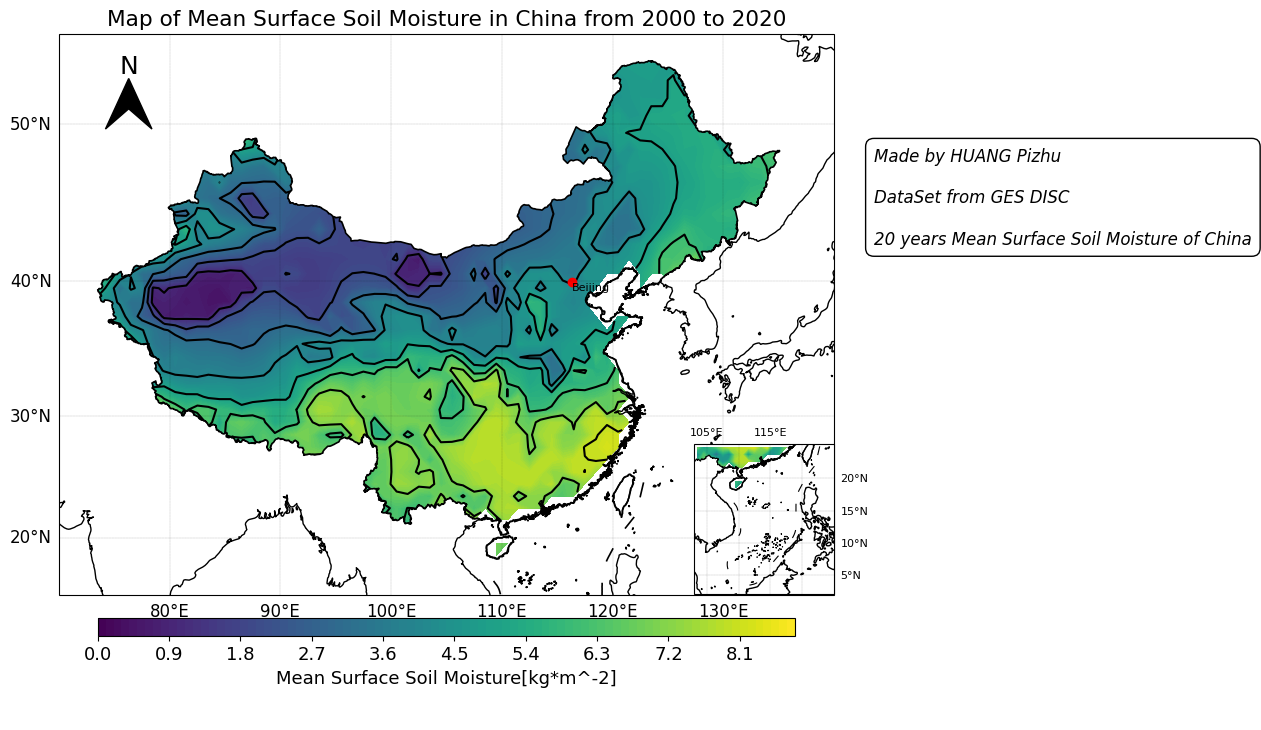

In [28]:
import matplotlib as mpl
from cnmaps import get_adm_maps, draw_maps,clip_contours_by_map, draw_map
mpl.rcParams["font.size"] = 13

# ----------------------------------- 绘制中国大地图 ---------------------------------- #
def map_plot(fig,ax,lat,lon,data, is_mask, title):
  # 获取地图
  big_map = get_adm_maps(country='中华人民共和国', level='国')  #包含南海九段线，用于地图绘制
  big_map_oneline = get_adm_maps(country='中华人民共和国', level='国', record='first', only_polygon=True)  #用于mask
  #绘制填色图和等高线
  cf = ax.contourf(lon, lat,data, cmap='viridis',levels=100,transform=ccrs.PlateCarree())
  cc = ax.contour(lon, lat,data,9,colors='black',transform=ccrs.PlateCarree())
  if is_mask:
     clip_contours_by_map(cf, big_map_oneline)
     clip_contours_by_map(cc, big_map_oneline)
  #绘制地图
  draw_maps(big_map,linewidth=1.2, color='k')    #仅绘制所有省份的一条边界
  #draw_maps(get_adm_maps(level='省'), linewidth=0.8, color='lightgrey')
  
  ax.plot(116.3, 39.9, 'ro', transform=ccrs.PlateCarree())
  ax.text(116.3, 39.9, 'Beijing', color='k', fontsize=8, transform=ccrs.PlateCarree(), va='top',ha='left')
  
  #添加海岸线
  ax.coastlines()
  #设置显示区域
  ax.set_extent([70,140,15,55], crs=ccrs.PlateCarree())
  #设置标题
  ax.set_title(title)
  #添加经纬度格网
  gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle="--",linewidth=0.1 ,x_inline=False, y_inline=False,color='k')
  gl.top_labels=False #关闭上部经纬标签                                  
  gl.right_labels=False#关闭右边经纬标签   
  gl.xlabel_style = {'size': 12}  # 设置经度标签的字体大小
  gl.ylabel_style = {'size': 12}  # 设置纬度标签的字体大小
# Manipulate latitude and longitude gridline numbers and spacing
  gl.ylocator = mticker.FixedLocator(np.arange(-90,91,10))
  gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 10))  
  
  #添加coloarbar
  fig.colorbar(cf,orientation='horizontal',
               aspect=40,pad = 0.03,shrink=0.9).set_label('Mean Surface Soil Moisture[kg*m^-2]')

# ---------------------------------- 添加南海小地图 --------------------------------- #
def add_nanhai (ax, pos, lat, lon, data):
    lon1, lon2, lat1, lat2 = 103, 125, 2, 25
    box_nanhai=[lon1, lon2, lat1, lat2]  #南海小地图的经纬度位置
    ax_nanhai = fig.add_axes(pos,projection = ccrs.Mercator())  #定义ax_nanhai
  
    nanhai = get_adm_maps(country='中华人民共和国', level='国') #包含南海九段线，用于地图绘制
    nanhai_oneline = get_adm_maps(country='中华人民共和国', level='国', record='first', only_polygon=True) #用于白化
    ax_nanhai.set_extent(box_nanhai, crs=ccrs.PlateCarree())
    cf = ax_nanhai.contourf(lon.loc[lon1:lon2], lat.loc[lat1:lat2],data.loc[lat1:lat2, lon1:lon2], 
                            cmap='viridis',levels=100,transform=ccrs.PlateCarree())
    clip_contours_by_map(cf, nanhai_oneline)
    draw_maps(nanhai,linewidth=0.8, color='k')
    ax_nanhai.coastlines()
    gl=ax_nanhai.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle="--",linewidth=0.1 ,x_inline=False, y_inline=False,color='k')
    gl.xlabels_top = True  
    gl.ylabels_left = False  
    gl.ylabels_right = True  
    gl.xlabels_bottom = False  
    gl.xlabel_style = {'size': 8}  # 设置经度标签的字体大小
    gl.ylabel_style = {'size': 8}  # 设置纬度标签的字体大小
# Manipulate latitude and longitude gridline numbers and spacing
    gl.ylocator = mticker.FixedLocator(np.arange(-90,91,5))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 5))  

# ------------------------------------ 画图 ------------------------------------ #
temp = dsm.copy()
proj = ccrs.Mercator()  #定义投影方式
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1, projection=proj)
map_plot(fig, ax1, lat, lon, temp, True, 
         'Map of Mean Surface Soil Moisture in China from 2000 to 2020') #绘制大地图
Text = 'Made by HUANG Pizhu\n\nDataSet from GES DISC\n\n20 years Mean Surface Soil Moisture of China'
ax1.text(0.94, 0.6, Text, transform=plt.gcf().transFigure, 
        fontsize=12, fontstyle='italic',ha='left', color='k',
        bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})
pos1 = [0.755, 0.25, 0.15, 0.15]  #南海小地图位置和长宽
add_nanhai(ax1,pos1,lat,lon,temp)  #添加南海小地图
add_north(ax1)#添加compass